In [2]:
import glob
import os
import random
import sys

In [3]:
import numpy as np

In [4]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from utils.npz_files import open_npz

In [5]:
random.seed(42)
np.random.seed(42)

In [6]:
RPMS_LIST = [1730, 1750, 1772, 1797]
FAULT_LIST = ['IR', 'B', 'OR@6', 'OR@3', 'OR@12']
DIAMETER_LIST = [7, 14, 21, 28]
END_LIST = ['FE', 'DE12', 'DE48']

In [7]:
NORMAL_PATTERN_FILES = "./Data/*/*_Normal.npz"

In [8]:
normal_files_list = glob.glob(NORMAL_PATTERN_FILES)

In [9]:
normal_files_list

[]

## Open normal data

In [10]:
print(os.listdir())

['__pycache__', '__init__.py', 'nb_01_generate_timeseries.ipynb', 'nb_00_read_01.ipynb', 'nb_02_generate_cwru.ipynb']


In [11]:
data_list = []
for item in normal_files_list:
    data = open_npz(item)
    data_list.append(data)

In [12]:
for item in data_list:
    for k in data.keys():
        print(k)
        print(item[k].shape)
        print()
    print()

In [13]:
def read_normal_data():
    normal_data = {}
    for rpm in RPMS_LIST:
        filename = f'../Data/{rpm} RPM/{rpm}_Normal.npz'
        data = open_npz(filename)
        rpm_key = f'{rpm}'
        normal_data[rpm_key] = {}
        for k in data.keys():
            normal_data[rpm_key][k] = data[k]
    return normal_data    


In [14]:
# print(read_normal_data())

In [15]:
import matplotlib.pyplot as plt

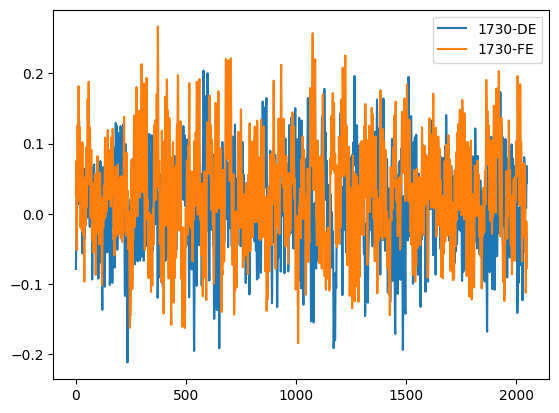

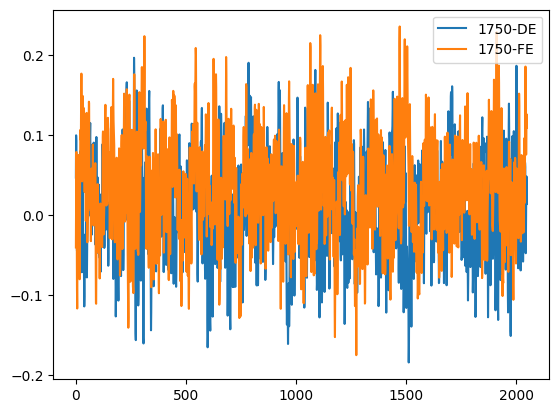

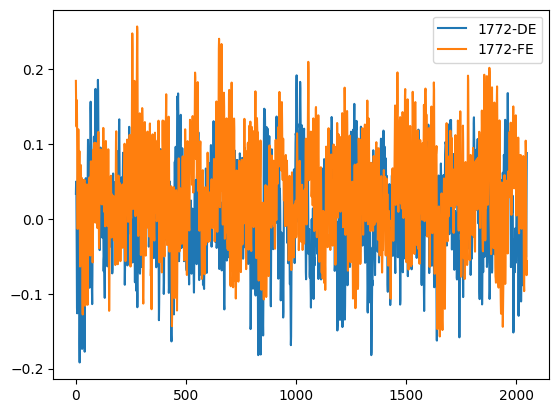

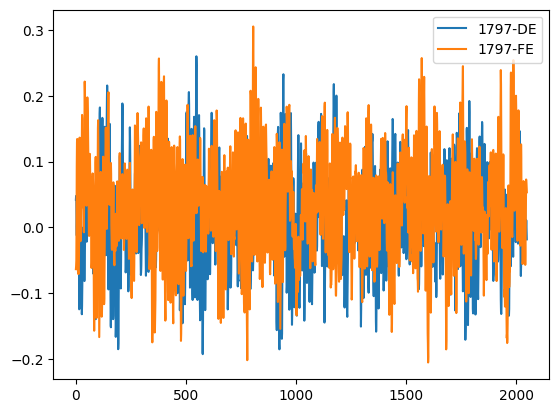

In [16]:
normal_data = read_normal_data()

for rpm_key in normal_data.keys():
    plt.figure()

    for key in normal_data[rpm_key].keys():        
        data = normal_data[rpm_key][key]
        random_index = random.randint(0, data.shape[0] - 2048)
        plt.plot(data[random_index : random_index + 2048], label=f'{rpm_key}-{key}')
        
    plt.axis(True)
    plt.legend()
    plt.show()

In [19]:
for dirpath, dirnames, filenames in os.walk("../Data"):
    for filename in filenames:
        if filename.endswith(".npz"):
            full_filename = os.path.join(dirpath, filename)
            data_keys = open_npz(full_filename).keys()
            print(data_keys)

KeysView(NpzFile '../Data/1772 RPM/1772_B_14_DE48.npz' with keys: DE, FE)
KeysView(NpzFile '../Data/1772 RPM/1772_OR@3_7_FE.npz' with keys: DE, FE, BA)
KeysView(NpzFile '../Data/1772 RPM/1772_B_21_DE48.npz' with keys: DE, FE)
KeysView(NpzFile '../Data/1772 RPM/1772_OR@12_7_DE12.npz' with keys: DE, FE, BA)
KeysView(NpzFile '../Data/1772 RPM/1772_B_21_FE.npz' with keys: DE, FE, BA)
KeysView(NpzFile '../Data/1772 RPM/1772_OR@6_21_DE48.npz' with keys: DE, FE)
KeysView(NpzFile '../Data/1772 RPM/1772_OR@3_21_DE12.npz' with keys: DE, FE, BA)
KeysView(NpzFile '../Data/1772 RPM/1772_OR@3_14_FE.npz' with keys: DE, FE, BA)
KeysView(NpzFile '../Data/1772 RPM/1772_OR@6_21_DE12.npz' with keys: DE, FE, BA)
KeysView(NpzFile '../Data/1772 RPM/1772_OR@3_21_DE48.npz' with keys: DE, FE)
KeysView(NpzFile '../Data/1772 RPM/1772_IR_7_DE12.npz' with keys: DE, FE, BA)
KeysView(NpzFile '../Data/1772 RPM/1772_IR_14_FE.npz' with keys: DE, FE, BA)
KeysView(NpzFile '../Data/1772 RPM/1772_IR_21_FE.npz' with keys: DE